## Problem Statement:

#### Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('uber.csv')

In [181]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [182]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [184]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [186]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [187]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [188]:
df.dropna(inplace=True)

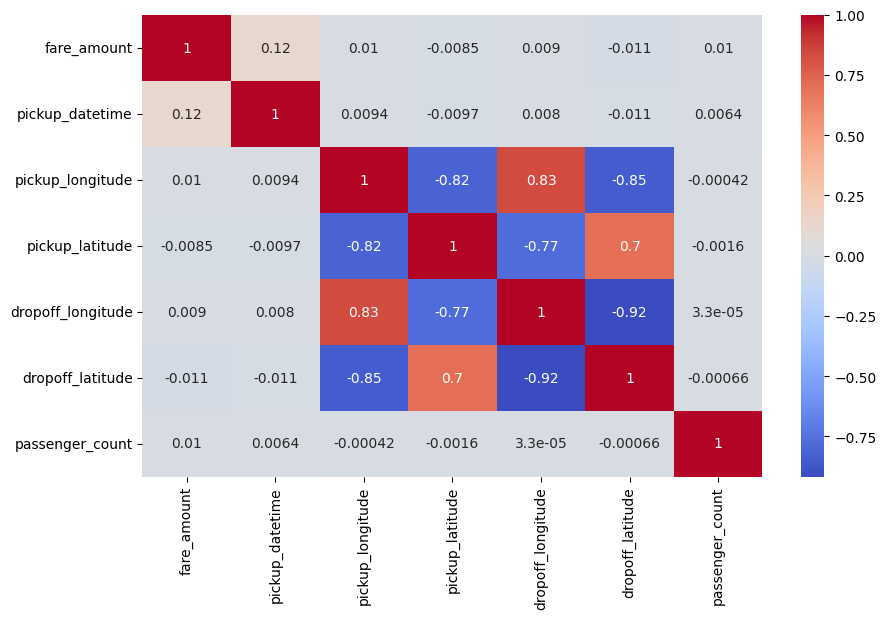

In [189]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

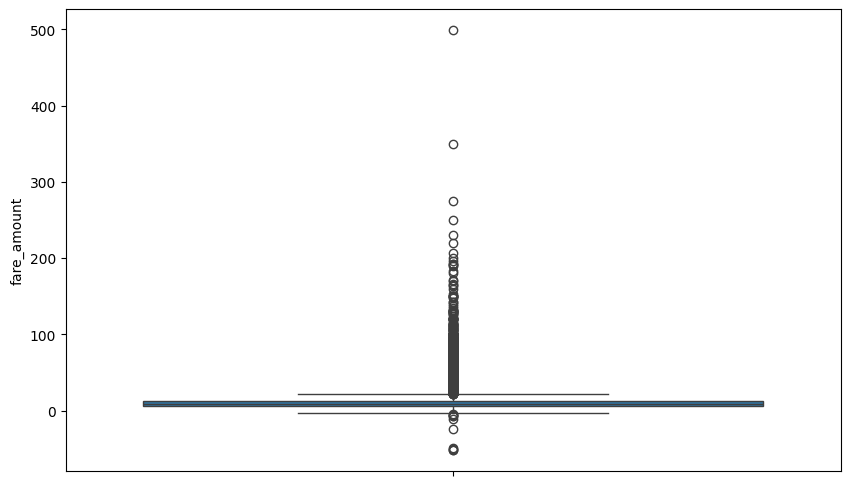

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['fare_amount'])
plt.show()

In [191]:
# Using Inter-Quantile Range to remove outliers
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] > lower) & (df['fare_amount'] < upper)]

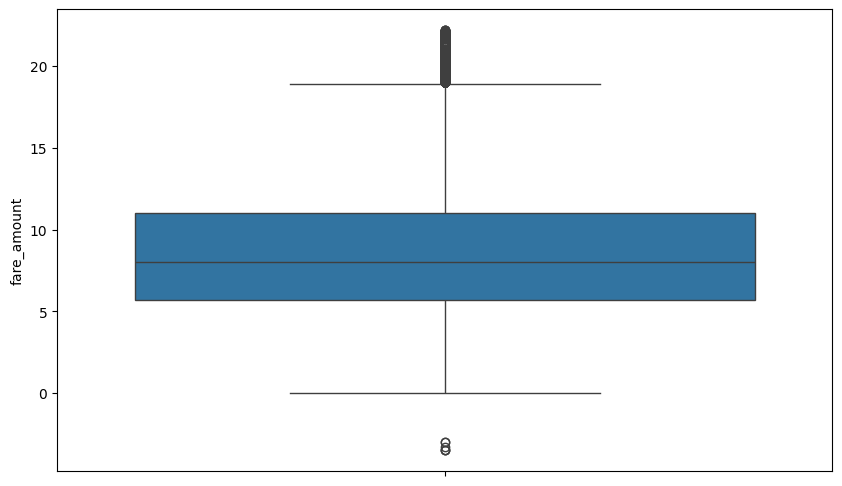

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['fare_amount'])
plt.show()

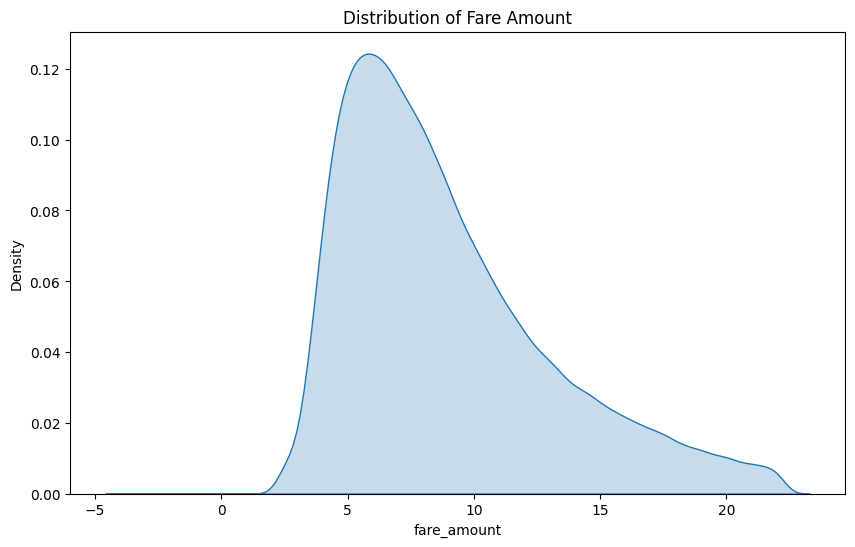

In [193]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['fare_amount'], fill=True)
plt.title('Distribution of Fare Amount')
plt.show()

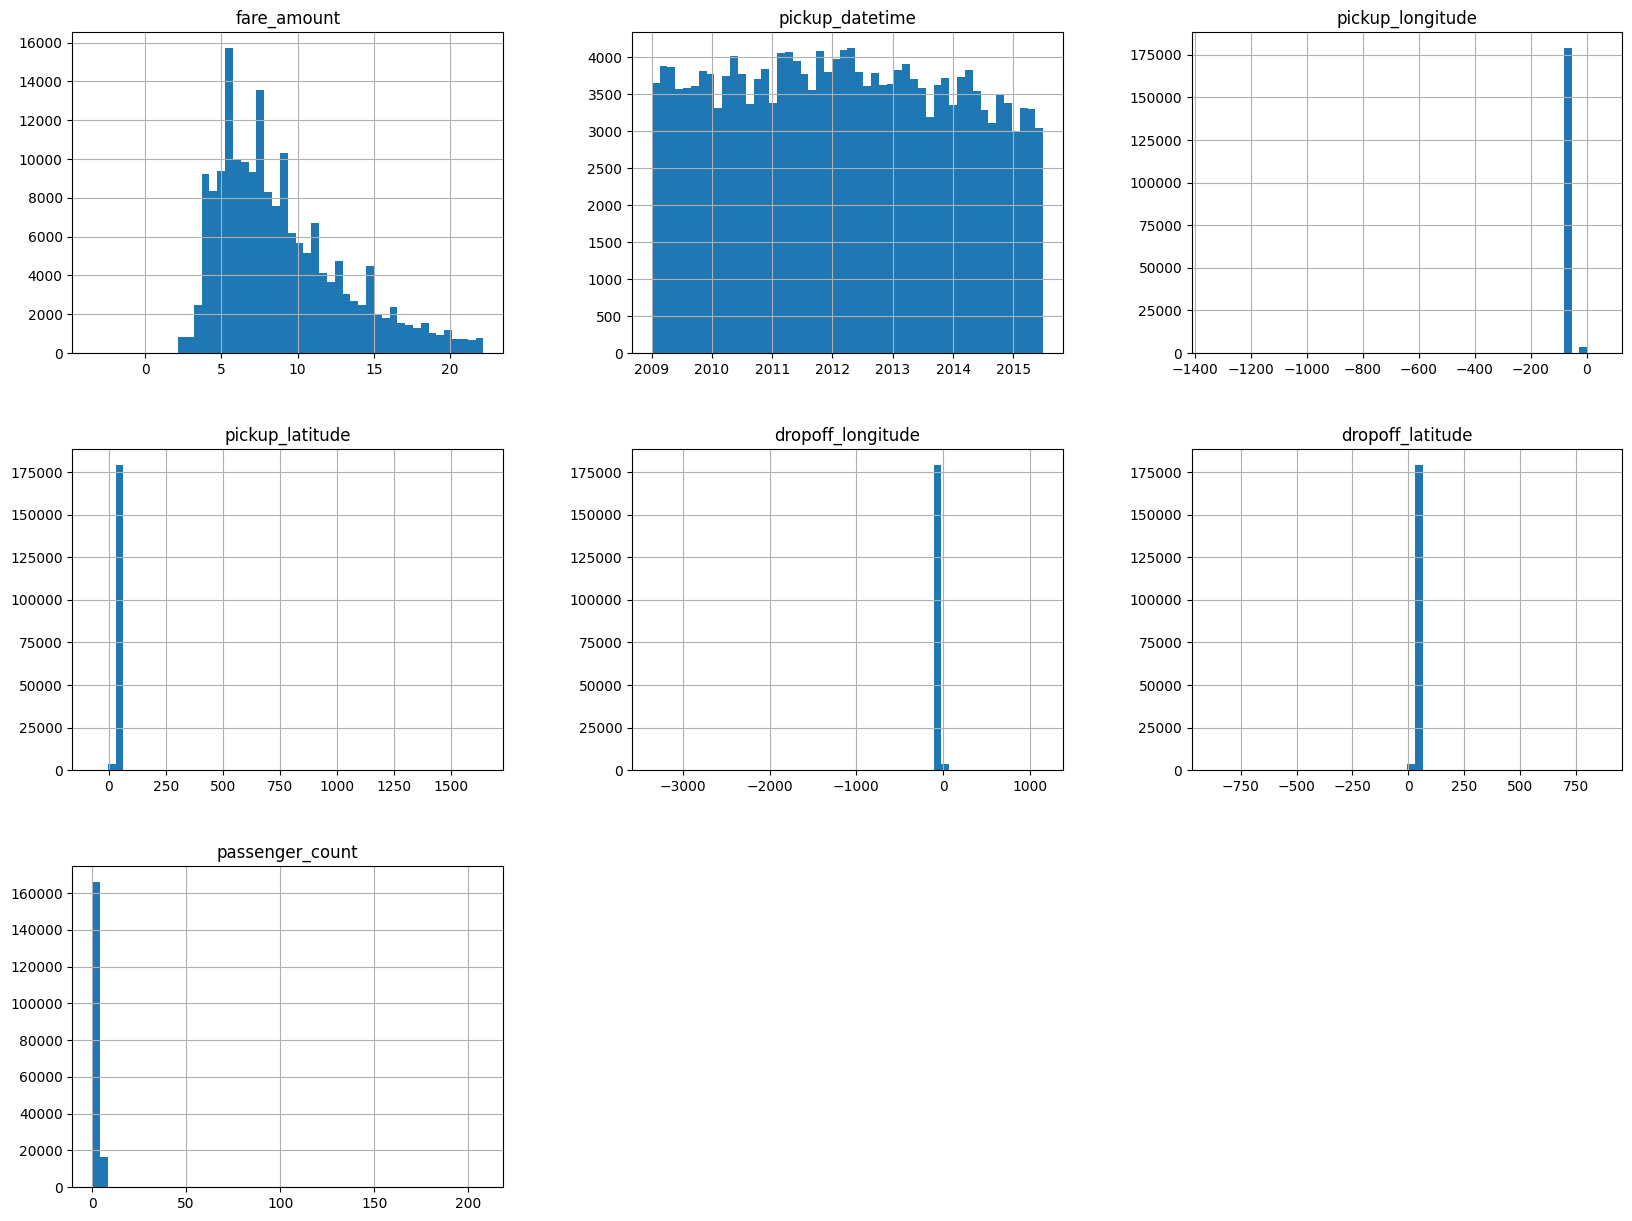

In [194]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [195]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X['pickup_datetime'] = pd.to_numeric(X['pickup_datetime'])

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = linear.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE for Linear Model: {rmse}")
print(f"MAE for Linear Model: {mae}")
print(f"R2 Score for Linear Model: {r2}")

RMSE for Linear Model: 4.093573440272825
MAE for Linear Model: 3.2421730963335875
R2 Score for Linear Model: 0.0207874252886856


In [199]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

rfrmodel.fit(X_train, y_train)
rfrmodel_pred = rfrmodel.predict(X_test)

In [200]:
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
rfrmodel_mae = mean_absolute_error(rfrmodel_pred, y_test)
rfrmodel_r2 = r2_score(rfrmodel_pred, y_test)

print(f"RMSE value for Random Forest is: {rfrmodel_rmse}")
print(f"MAE value for Random Forest is: {rfrmodel_mae}")
print(f"R2 Score for Random Forest is: {rfrmodel_r2}")

RMSE value for Random Forest is: 2.1084666302961206
MAE value for Random Forest is: 1.4352886646429843
R2 Score for Random Forest is: 0.6454603235395092
